<a href="https://colab.research.google.com/github/Maureen36Mathenge/Marketing-Stratiegies---R/blob/master/Marketing_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Define the Question

## Specify the Question

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into three parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

## Deliverables/Objectives

Part 1: Dimensionality Reduction

This section of the project entails reducing your dataset to a low dimensional dataset using the t-SNE algorithm or PCA. You will be required to perform your analysis and provide insights gained from your analysis.

Part 2: Feature Selection

This section requires you to perform feature selection through the use of the unsupervised learning methods learned earlier this week. You will be required to perform your analysis and provide insights on the features that contribute the most information to the dataset.

Part 3: Association Rules

This section will require that you create association rules that will allow you to identify relationships between variables in the dataset. You are provided with a separate dataset that comprises groups of items that will be associated with others. Just like in the other sections, you will also be required to provide insights for your analysis.

Part 4: Anomaly Detection

You have also been requested to check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection.


## Metrics

Increase the sales / Generate more profits

## Context



## Experimental Design

CRISP- DM methodology will be applied. Below steps will be undertaken to create the classifer.



*  Business understanding - understanding the background

*  Data understanding

* Exploratory data analysis

* Feature engineering

* Data modelling

* Model interpretation







# Install and read the libraries

In [166]:
#INSTALL LIBRARIES
#install.packages('dplyr')
library(dplyr)
library(tidyr)
install.packages('lubridate')
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Dimensionality and Feature Selection

## Upload and Reading the data

In [167]:
#upload the data
df = read.csv("Supermarket_Dataset_1 - Sales Data.csv")
head(df)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


## Data Understanding

Variables

cogs (cost of goods) - direct costs of producing the goods sold by a company. This amount includes the cost of the materials and labor directly used to create the good.

gross.margin.percentage - a measure of how efficiently the company produces and distributes its goods, but the percentage must be viewed in relation to other companies in its industry.

gross income - is the sum of all wages, salaries, profits, interest payments, rents, and other forms of earnings, before any deductions or taxes.

In [168]:
#checking the number of rows and columns
str(df)

#this dataframe has 1000 rows and 16 columns 
# 8 are factors,7 are numeric nad 1 is an integer

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

In [169]:
#print(unique(df["Branch"]))
#number of unique elements in the dataset
lapply(df, function(x) length(table(x)))

## Assumptions 
#it is likely that this dataset contains no duplicates since the invoice id are all different 
#from this i would say that the profit margins are not improving
# the gross percentage income is 4.761905 except for one instance indicating the profit margins are stagnant which is not so good for the business

$Invoice.ID
[1] 1000

$Branch
[1] 3

$Customer.type
[1] 2

$Gender
[1] 2

$Product.line
[1] 6

$Unit.price
[1] 943

$Quantity
[1] 10

$Tax
[1] 990

$Date
[1] 89

$Time
[1] 506

$Payment
[1] 3

$cogs
[1] 990

$gross.margin.percentage
[1] 1

$gross.income
[1] 990

$Rating
[1] 61

$Total
[1] 990

## Data Cleaning

### Validity - outliers

In [170]:
#create a dataframe with just numeric values to plot the boxplots
num_int <- df[ , -which(names(df) %in% c("Branch","Customer.type","Gender","Product.line","Payment"))]
head(num_int)

,Invoice.ID,Unit.price,Quantity,Tax,Date,Time,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,74.69,7,26.1415,1/5/2019,13:08,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,15.28,5,3.8200,3/8/2019,10:29,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,46.33,7,16.2155,3/3/2019,13:23,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,58.22,8,23.2880,1/27/2019,20:33,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,86.31,7,30.2085,2/8/2019,10:37,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,85.39,7,29.8865,3/25/2019,18:30,597.73,4.761905,29.8865,4.1,627.6165


In [171]:
colnames(num_int)

[1] "Invoice.ID"              "Unit.price"             
 [3] "Quantity"                "Tax"                    
 [5] "Date"                    "Time"                   
 [7] "cogs"                    "gross.margin.percentage"
 [9] "gross.income"            "Rating"                 
[11] "Total"

In [172]:
#plot the boxplot
boxplot(df$Invoice.ID	,df$Unit.price,df$Quantity,	df$Tax	,df$Date,	df$Time,	df$cogs	,df$gross.margin.percentage	,df$gross.income	,df$Rating,	df$Total,
main = "Multiple boxplots for comparision",
at = c(1,2,4,5),
names = c('Invoice.ID','Unit.price','Quantity','Tax','Date','Time','cogs','gross.margin.percentage','gross.income','Rating','Total'),
las = 2,
col = c("orange","red"),
border = "brown",
horizontal = TRUE,
notch = TRUE
)

ERROR: ignored

### Completeness

In [0]:
#install dataexplorer to help with visualization
install.packages("DataExplorer")
library(DataExplorer)

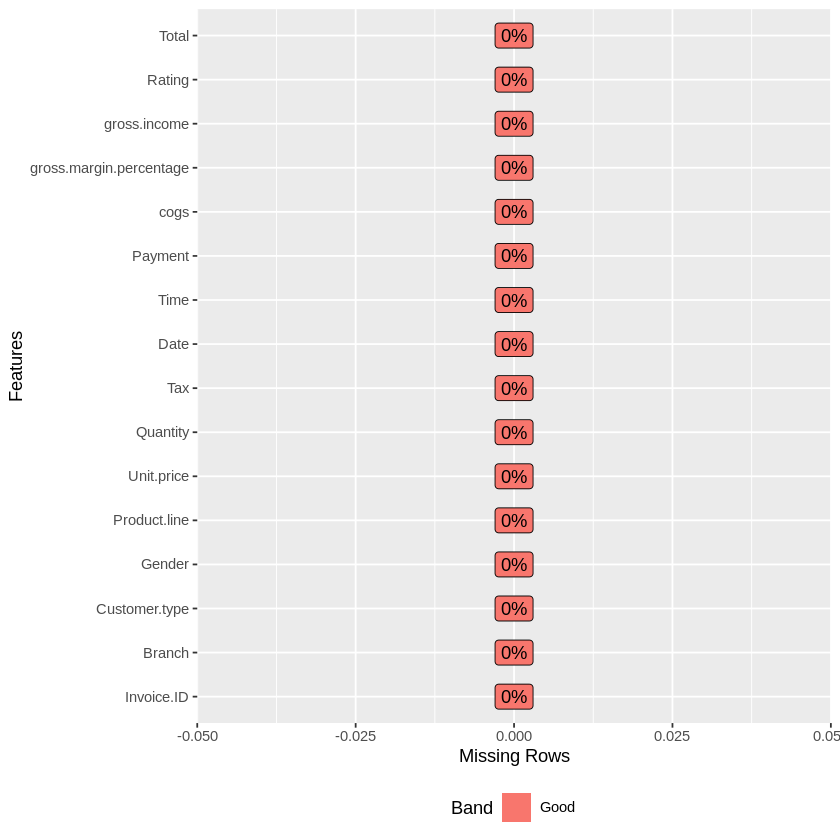

In [173]:
#visualize missing values
plot_missing(df)

#there exists no missing values 

In [174]:
#check for missing values 
colSums(is.na(df))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

### Consistency

In [175]:
#look out for duplicates
#in this case we shall be confirming our assumption
anyDuplicated(df)

#there exists no duplicates in the dataset

[1] 0

**PCA**

 Dimensionality Reduction is the process of reducing the dimensions of data without loosing much of information
 PCA can be applied only to numeric data. Therefore we need to encode the columns 

In [0]:
#convert to numeric and encoded
df$	Invoice.ID_new <- as.numeric(df$Invoice.ID)
df$Branch_new <- as.numeric(as.factor(df$Branch))
df$Customer.type_new <- as.numeric(as.factor(df$Customer.type))
df$Gender_new <- as.numeric(as.factor(df$Gender))
df$Product.line_new <- as.numeric(as.factor(df$Product.line))
df$Payment_new <- as.numeric(as.factor(df$Payment))
df$	Time_new <- as.numeric(df$Time)


In [0]:
#manual encoding
#df$Branch_new = factor(df$Branch,
 #              levels = c('A', 'B', 'C'),
  #             labels = c(10, 2, 3))

#df$Customer.type_new = factor(df$Customer.type,
 #              levels = c('	Member', 'Normal'),
  #             labels = c(10,2))         

#df$Gender_new = factor(df$Gender,
   #            levels = c('	Female', 'Male'),
    #           labels = c(10,2))   

 #df$Product.line_new = factor(df$Product.line,
  #             levels = c('	Health and beauty', 'Electronic accessories','Home and lifestyle','Sports and travel','Food and beverages','Fashion accessories'),
   #            labels = c(10,2,3,4,5,6))   

#df$Payment_new = factor(df$Payment,
 #              levels = c('	Ewallet', 'Cash','Credit card'),
  #             labels = c(10,2,3))

In [0]:
#convert factor to numeric
#df$Customer.type <- as.numeric(as.character(df$Customer.type))
#df$Branch_new <- as.numeric(df$Branch_new)
#df$Customer.type_new <- as.numeric(df$Customer.type_new)
#df$Gender_new <- as.numeric(df$Gender_new)
#df$Product.line_new <- as.numeric(df$Product.line_new)
#df$Payment_new <- as.numeric(df$Payment_new)


In [0]:
#seperate the year,month and day
#convert to date format
df$Date <- as.Date(df$Date, format="%m/%d/%y")

#get the seperate columns
df$year <- year(ymd(df$Date))
df$month <- month(ymd(df$Date)) 
df$day <- day(ymd(df$Date))

In [201]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)
head(df)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,Branch_new,Customer.type_new,Gender_new,Product.line_new,Payment_new,year,month,day,Invoice.ID_new,Time_new
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,1,1,1,4,3,2019,1,5,815,147
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200,3,2,1,1,1,2019,3,8,143,24
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255,1,2,2,5,2,2019,3,3,654,156
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,1,1,2,4,3,2019,1,27,19,486
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,1,2,2,6,3,2019,2,8,340,30
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165,3,2,2,1,3,2019,3,25,734,394


In [202]:
#the dataset contain data only from 2019
print(unique(df["year"]))
#its also data from 3 months(JAN,FEB,MARCH)
print(unique(df["month"]))

  year
1 2019
  month
1     1
2     3
5     2


In [204]:
#create a dataframe with all numeric and integer values 
new_df <- df[sapply(df,is.numeric)]

#print results
head(new_df)

#we can therefore conduct PCA 

,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total,Branch_new,Customer.type_new,Gender_new,Product.line_new,Payment_new,year,month,day,Invoice.ID_new,Time_new
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,4.761905,26.1415,9.1,548.9715,1,1,1,4,3,2019,1,5,815,147
2,15.28,5,3.8200,76.40,4.761905,3.8200,9.6,80.2200,3,2,1,1,1,2019,3,8,143,24
3,46.33,7,16.2155,324.31,4.761905,16.2155,7.4,340.5255,1,2,2,5,2,2019,3,3,654,156
4,58.22,8,23.2880,465.76,4.761905,23.2880,8.4,489.0480,1,1,2,4,3,2019,1,27,19,486
5,86.31,7,30.2085,604.17,4.761905,30.2085,5.3,634.3785,1,2,2,6,3,2019,2,8,340,30
6,85.39,7,29.8865,597.73,4.761905,29.8865,4.1,627.6165,3,2,2,1,3,2019,3,25,734,394


In [0]:
#there is a possibility scaling is a problem because if the integer columns
new_df$	day <- as.numeric(new_df$day)
new_df$	Quantity <- as.numeric(new_df$Quantity)

In [216]:
head(new_df)

,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total,Branch_new,Customer.type_new,Gender_new,Product.line_new,Payment_new,year,month,day,Invoice.ID_new,Time_new
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,4.761905,26.1415,9.1,548.9715,1,1,1,4,3,2019,1,5,815,147
2,15.28,5,3.8200,76.40,4.761905,3.8200,9.6,80.2200,3,2,1,1,1,2019,3,8,143,24
3,46.33,7,16.2155,324.31,4.761905,16.2155,7.4,340.5255,1,2,2,5,2,2019,3,3,654,156
4,58.22,8,23.2880,465.76,4.761905,23.2880,8.4,489.0480,1,1,2,4,3,2019,1,27,19,486
5,86.31,7,30.2085,604.17,4.761905,30.2085,5.3,634.3785,1,2,2,6,3,2019,2,8,340,30
6,85.39,7,29.8865,597.73,4.761905,29.8865,4.1,627.6165,3,2,2,1,3,2019,3,25,734,394


Because you can't divide by the standard deviation if it's infinity. To identify the zero-variance column, we can use which as follows to get the variable name.

In [217]:
which(apply(new_df, 2, var)==0)

gross.margin.percentage                    year 
                      5                      14

And to remove zero variance columns from the dataset, you can use the same apply expression, setting variance not equal to zero.

In [0]:
final_df <- new_df[ , which(apply(new_df, 2, var) != 0)]

In [224]:
head(final_df)

,Unit.price,Quantity,Tax,cogs,gross.income,Rating,Total,Branch_new,Customer.type_new,Gender_new,Product.line_new,Payment_new,month,day,Invoice.ID_new,Time_new
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,26.1415,9.1,548.9715,1,1,1,4,3,1,5,815,147
2,15.28,5,3.8200,76.40,3.8200,9.6,80.2200,3,2,1,1,1,3,8,143,24
3,46.33,7,16.2155,324.31,16.2155,7.4,340.5255,1,2,2,5,2,3,3,654,156
4,58.22,8,23.2880,465.76,23.2880,8.4,489.0480,1,1,2,4,3,1,27,19,486
5,86.31,7,30.2085,604.17,30.2085,5.3,634.3785,1,2,2,6,3,2,8,340,30
6,85.39,7,29.8865,597.73,29.8865,4.1,627.6165,3,2,2,1,3,3,25,734,394


In [234]:
df_pca <- prcomp(final_df, scale.=T)
# It tries to center data with mean =0. The parameter scale. is set ‘T’ which means standard deviation is set 1.

df_pca

Standard deviations (1, .., p=16):
 [1] 2.220436e+00 1.091045e+00 1.080350e+00 1.061351e+00 1.028061e+00
 [6] 9.995489e-01 9.939866e-01 9.782927e-01 9.666623e-01 9.472319e-01
[11] 9.194654e-01 9.043853e-01 2.992902e-01 1.567397e-16 1.468097e-16
[16] 6.193377e-17

Rotation (n x k) = (16 x 16):
                            PC1         PC2          PC3          PC4
Unit.price        -0.2910956532 -0.21528946  0.190209143 -0.084378815
Quantity          -0.3244041614  0.17545286 -0.165104492  0.069792362
Tax               -0.4492976910 -0.01126919 -0.006634552 -0.003545606
cogs              -0.4492976910 -0.01126919 -0.006634552 -0.003545606
gross.income      -0.4492976910 -0.01126919 -0.006634552 -0.003545606
Rating             0.0185733957  0.03242720  0.206750795  0.153331970
Total             -0.4492976910 -0.01126919 -0.006634552 -0.003545606
Branch_new        -0.0224059247  0.23905198  0.344340355 -0.367175767
Customer.type_new  0.0123369779 -0.30489936  0.007610097  0.238871101
Gender

The first component has the highest variance, the second has the second highest variance etc 

In [235]:
summary(df_pca)

Importance of components:
                          PC1    PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     2.2204 1.0910 1.08035 1.0614 1.02806 0.99955 0.99399
Proportion of Variance 0.3081 0.0744 0.07295 0.0704 0.06606 0.06244 0.06175
Cumulative Proportion  0.3081 0.3825 0.45549 0.5259 0.59195 0.65440 0.71615
                           PC8    PC9    PC10    PC11    PC12   PC13      PC14
Standard deviation     0.97829 0.9667 0.94723 0.91947 0.90439 0.2993 1.567e-16
Proportion of Variance 0.05982 0.0584 0.05608 0.05284 0.05112 0.0056 0.000e+00
Cumulative Proportion  0.77596 0.8344 0.89044 0.94328 0.99440 1.0000 1.000e+00
                            PC15      PC16
Standard deviation     1.468e-16 6.193e-17
Proportion of Variance 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00

The first component(PC1) contributes 30% of the important data 

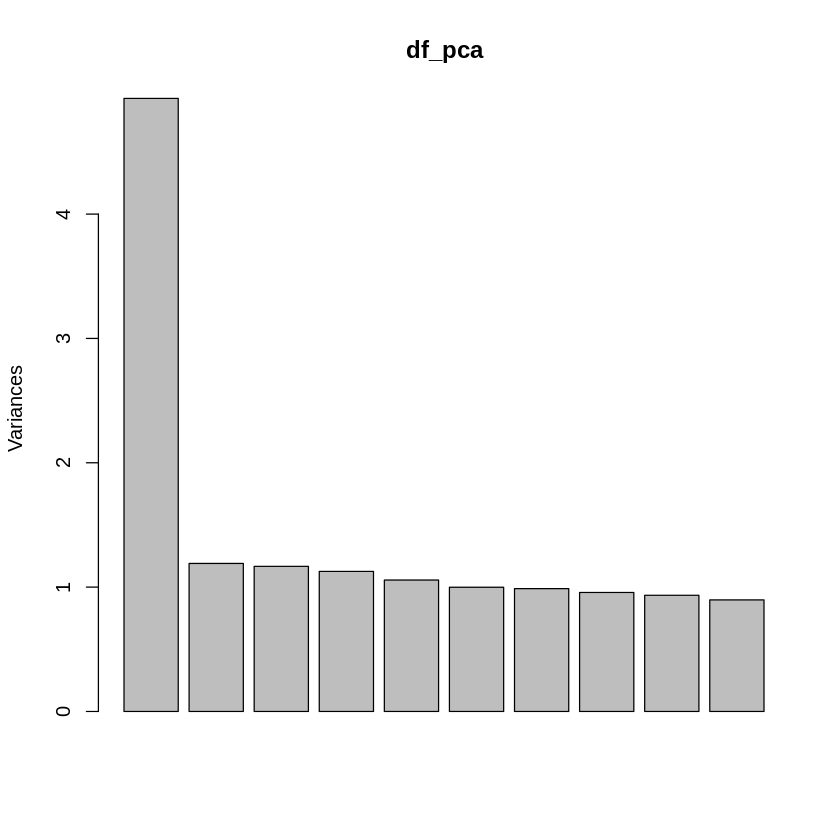

In [231]:
#plot to check the variances
plot(df_pca)
#the first bar shows the variance of the first component
#it decreases significantly to the second variable 
#the trend continues

Conclusion

Where much of the variance is,much of the information is held there

PC1 carries 30% of the important information for our analysis

### Application of t-SNE

In [182]:
#install packages
install.packages("Rtsne")
# Loading our tnse library
library(Rtsne)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Association Rules

## Upload and read the data

In [183]:
#upload the data
dff = read.csv("Supermarket_Sales_Dataset II.csv")
#read
head(dff)

,shrimp,almonds,avocado,vegetables.mix,green.grapes,whole.weat.flour,yams,cottage.cheese,energy.drink,tomato.juice,low.fat.yogurt,green.tea,honey,salad,mineral.water,salmon,antioxydant.juice,frozen.smoothie,spinach,olive.oil
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,NA
2,chutney,,,,,,,,,,,,,,,,,,,NA
3,turkey,avocado,,,,,,,,,,,,,,,,,,NA
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,NA
5,low fat yogurt,,,,,,,,,,,,,,,,,,,NA
6,whole wheat pasta,french fries,,,,,,,,,,,,,,,,,,NA


Data Understanding

In [184]:
#check for the data types and number of rows and columns
str(dff)
# All the variables are factors except the column "olive.oil"

'data.frame':	7500 obs. of  20 variables:
 $ shrimp           : Factor w/ 115 levels "almonds","antioxydant juice",..: 15 27 108 72 65 112 98 49 43 37 ...
 $ almonds          : Factor w/ 118 levels "","almonds","antioxydant juice",..: 69 1 5 71 1 43 63 99 1 85 ...
 $ avocado          : Factor w/ 116 levels "","almonds","antioxydant juice",..: 36 1 1 37 1 1 93 53 1 1 ...
 $ vegetables.mix   : Factor w/ 115 levels "","almonds","antioxydant juice",..: 1 1 1 112 1 1 1 1 1 1 ...
 $ green.grapes     : Factor w/ 111 levels "","almonds","antioxydant juice",..: 1 1 1 51 1 1 1 1 1 1 ...
 $ whole.weat.flour : Factor w/ 107 levels "","almonds","antioxydant juice",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ yams             : Factor w/ 103 levels "","almonds","antioxydant juice",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ cottage.cheese   : Factor w/ 99 levels ""," asparagus",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ energy.drink     : Factor w/ 89 levels "","almonds","antioxydant juice",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ tomato.juice    

In [185]:
#Sum of unique values per column
lapply(dff, function(x) length(table(x)))

$shrimp
[1] 115

$almonds
[1] 118

$avocado
[1] 116

$vegetables.mix
[1] 115

$green.grapes
[1] 111

$whole.weat.flour
[1] 107

$yams
[1] 103

$cottage.cheese
[1] 99

$energy.drink
[1] 89

$tomato.juice
[1] 81

$low.fat.yogurt
[1] 67

$green.tea
[1] 51

$honey
[1] 43

$salad
[1] 29

$mineral.water
[1] 19

$salmon
[1] 8

$antioxydant.juice
[1] 3

$frozen.smoothie
[1] 3

$spinach
[1] 3

$olive.oil
[1] 0

# Anomally Detection

In [186]:
#upload the data
dfff = read.csv("Supermarket_Sales_Forecasting - Sales.csv")
head(dfff)

,Date,Sales
,<fct>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165
